# Time Series Analysis

Components in time series: Trend, Seasonality, Cycle, Variation
    
Forecasting Models: ARIMA Model, Exponential Smooting
    
Implement: Python(Pandas, Matplotlib)

In [32]:
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2017, 1, 1))

pd.Timestamp('2017-01-01') == time_stamp

True

In [33]:
time_stamp.day_name()

'Sunday'

In [34]:
pd.Period('2017-01')

In [ ]:
## creating date range
index = pd.date_range(start='2017-01-01', periods=12, freq='M')

In [36]:
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [40]:
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [43]:
### create a time series
# data = np.random.random((size=12,2))
# pd.DateFrame(data=data, index=index).info()

In [44]:
google = pd.read_csv('datasets/stock_data/goog_fb.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    504 non-null    object 
 1   FB      504 non-null    float64
 2   GOOG    504 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


In [45]:
google.head()

,date,FB,GOOG
0,2015-01-02,78.45,524.81
1,2015-01-05,77.19,513.87
2,2015-01-06,76.15,501.96
3,2015-01-07,76.15,501.10
4,2015-01-08,78.18,502.68


In [46]:
## we need to convert the string date to datetime64
google.date = pd.to_datetime(google.date)

In [47]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    504 non-null    datetime64[ns]
 1   FB      504 non-null    float64       
 2   GOOG    504 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.9 KB


In [48]:
google.set_index('date', inplace=True) ## inplace means don't create a copy

In [49]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


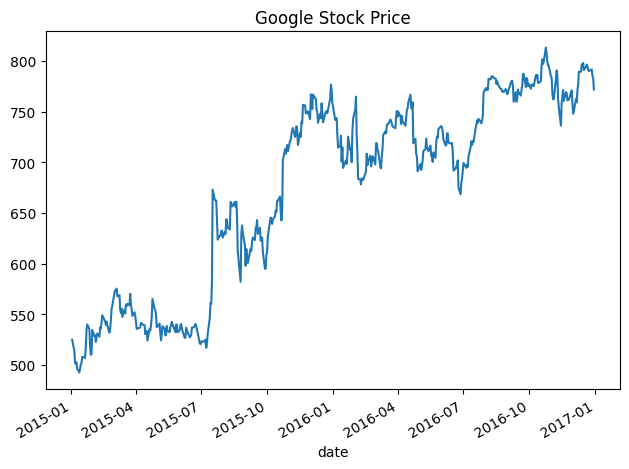

In [53]:
import matplotlib.pyplot as plt

google['GOOG'].plot(title='Google Stock Price')
plt.tight_layout();
plt.show()

In [55]:
google['GOOG']['2015'].info() ## returns date on this year

<class 'pandas.core.series.Series'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Series name: GOOG
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [56]:
google['GOOG']['2015-3':'2016-2'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 252 entries, 2015-03-02 to 2016-02-29
Series name: GOOG
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [63]:
price = google['GOOG']
google.loc['2016-6-1', 'GOOG']

734.15

In [70]:
## To set frequency to days
google.asfreq('D').head()

,FB,GOOG
date,,
2015-01-02,78.45,524.81
2015-01-03,NaN,NaN
2015-01-04,NaN,NaN
2015-01-05,77.19,513.87
2015-01-06,76.15,501.96


In [71]:
## To set frequency to business days
google.asfreq('B').head()

,FB,GOOG
date,,
2015-01-02,78.45,524.81
2015-01-05,77.19,513.87
2015-01-06,76.15,501.96
2015-01-07,76.15,501.10
2015-01-08,78.18,502.68


In [72]:
google[price.isnull()]

,FB,GOOG
date,,


## Turning the data into timeseries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


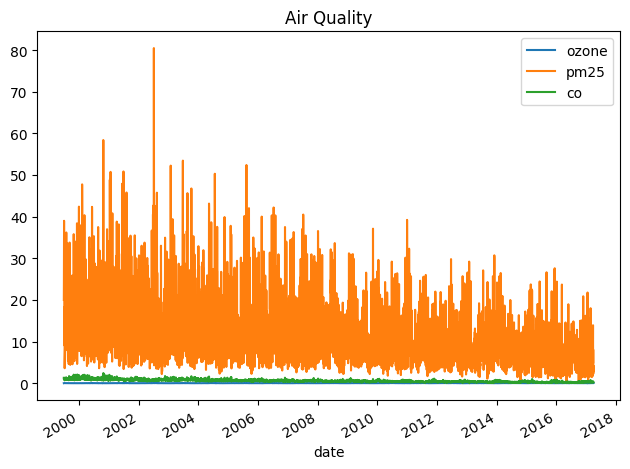

In [68]:
data = pd.read_csv('datasets/air_quality_data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(title='Air Quality')
plt.tight_layout();
plt.show()


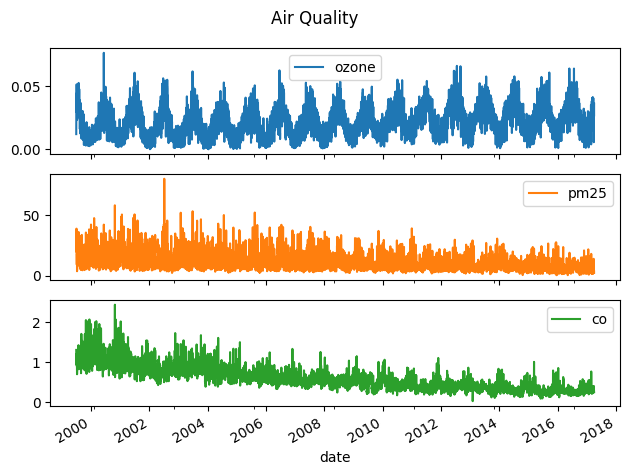

In [69]:
data.plot(title='Air Quality', subplots=True)
plt.tight_layout();
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    782 non-null    object 
 1   price   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


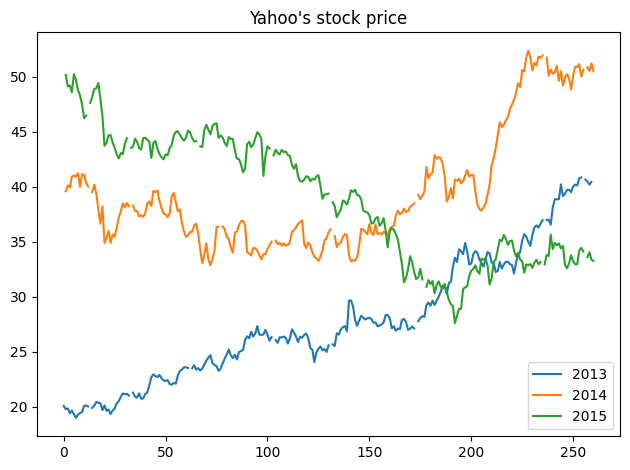

In [78]:
yahoo = pd.read_csv('datasets/stock_data/yahoo.csv')

yahoo.info()

# Convert the date column to datetime64
yahoo.date = pd.to_datetime(yahoo.date)

# Set date column as index
yahoo.set_index('date', inplace=True)

yahoo.info()

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(title="Yahoo's stock price")
plt.tight_layout();
plt.show()

### The plot shows Yahoo's stock price in three different years.